In [3]:
import os
os.chdir('..')

In [4]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

from load_data import load_data, process_data

In [6]:
DATA_DIR = Path.cwd() / 'data'
CACA_PATH = DATA_DIR / 'WhatsApp Chat with Caca.txt'

assert CACA_PATH.exists()

In [7]:
POOP_EMOJI = '💩'

data = load_data(CACA_PATH)
data = process_data(data)

Text(0.5, 1.0, 'Poop Emoji Count by User')

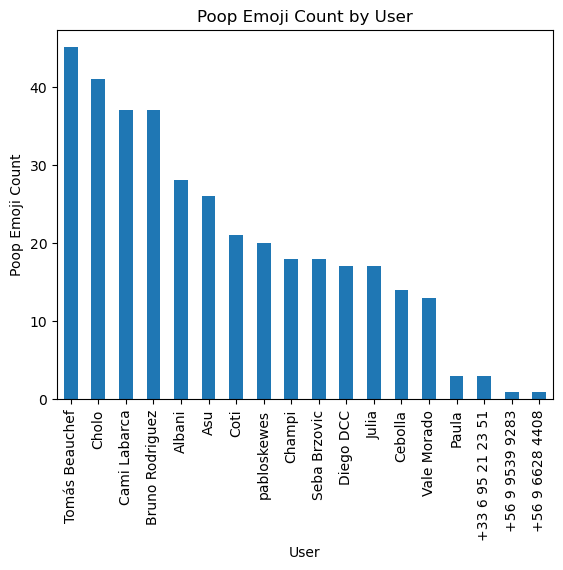

In [8]:
data.user.value_counts().plot.bar()
plt.xlabel('User')
plt.ylabel('Poop Emoji Count')
plt.title('Poop Emoji Count by User')

In [13]:
data

,datetime,user
2,2023-11-28 00:39:00,Paula
3,2023-11-28 00:39:00,pabloskewes
5,2023-11-28 09:06:00,Albani
6,2023-11-28 09:09:00,Cami Labarca
7,2023-11-28 09:33:00,Paula
...,...,...
358,2023-12-15 13:49:00,Tomás Beauchef
359,2023-12-15 13:51:00,Albani
360,2023-12-15 16:08:00,Cholo
361,2023-12-15 16:49:00,Bruno Rodriguez


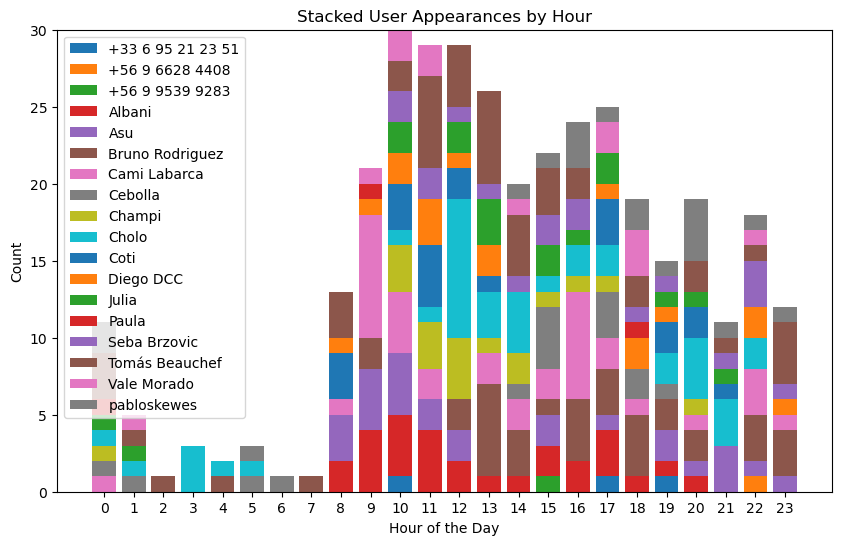

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame with time and user columns
data = data[["datetime","user"]]

df = pd.DataFrame(data)

# Convert 'datetime' column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Group by user and hour, and count the occurrences
user_hourly_counts = df.groupby([df['datetime'].dt.hour, 'user']).size().unstack(fill_value=0)

# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))

bottom = None
for user in user_hourly_counts.columns:
    ax.bar(user_hourly_counts.index, user_hourly_counts[user], label=user, bottom=bottom)
    if bottom is None:
        bottom = user_hourly_counts[user]
    else:
        bottom += user_hourly_counts[user]

# Set labels and title
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Count')
ax.set_title('Stacked User Appearances by Hour')

# Add a legend
ax.legend()

# Set x-axis to show hourly ticks
ax.set_xticks(range(24))

# Show the plot
plt.show()


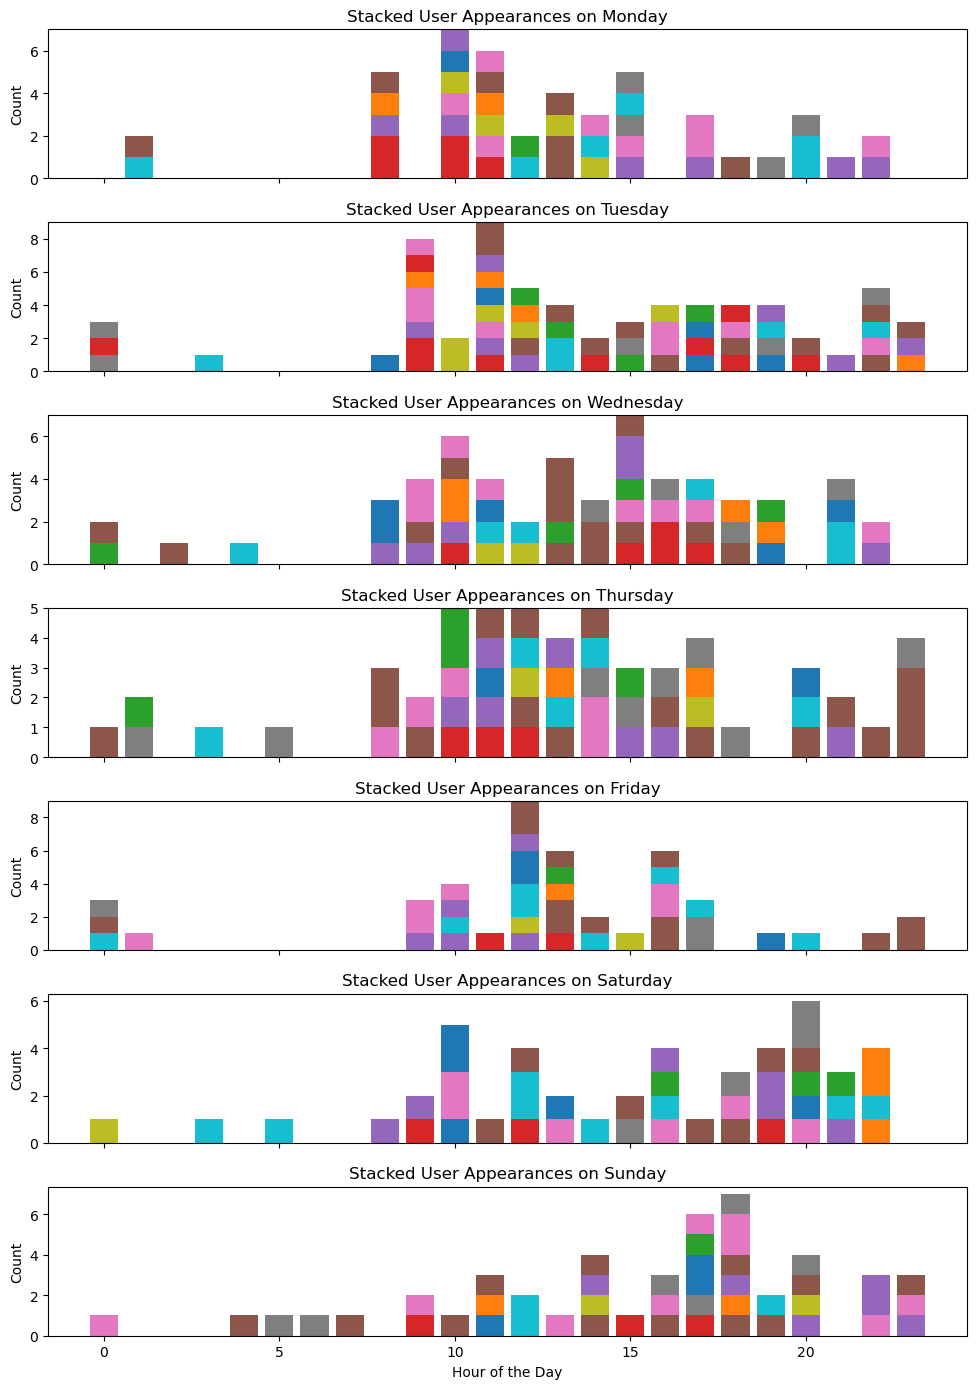

In [26]:
# Create the DataFrame
df = pd.DataFrame(data)

# Convert 'datetime' column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract the day of the week and hour
df['day_of_week'] = df['datetime'].dt.day_name()
df['hour_of_day'] = df['datetime'].dt.hour

# Group by day of the week, hour, and user, and count the occurrences
user_hourly_counts = df.groupby(['day_of_week', 'hour_of_day', 'user']).size().unstack(fill_value=0)

# Create the stacked bar plot for each day of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, axes = plt.subplots(len(days_of_week), 1, figsize=(10, 14), sharex=True)

for i, day in enumerate(days_of_week):
    ax = axes[i]
    
    # Filter data for the current day
    day_data = user_hourly_counts.loc[day]
    
    bottom = None
    for user in day_data.columns:
        ax.bar(day_data.index, day_data[user], label=user, bottom=bottom)
        if bottom is None:
            bottom = day_data[user]
        else:
            bottom += day_data[user]

    # Set labels and title
    ax.set_ylabel('Count')
    ax.set_title(f'Stacked User Appearances on {day}')

    # Add a legend
    # ax.legend()

# Set x-axis to show hourly ticks
axes[-1].set_xlabel('Hour of the Day')

# Show the plot
plt.tight_layout()

plt.show()

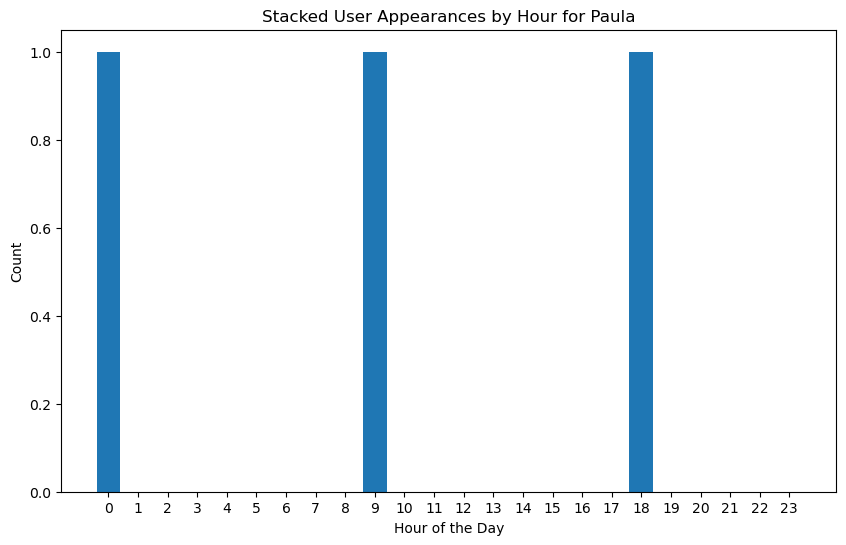

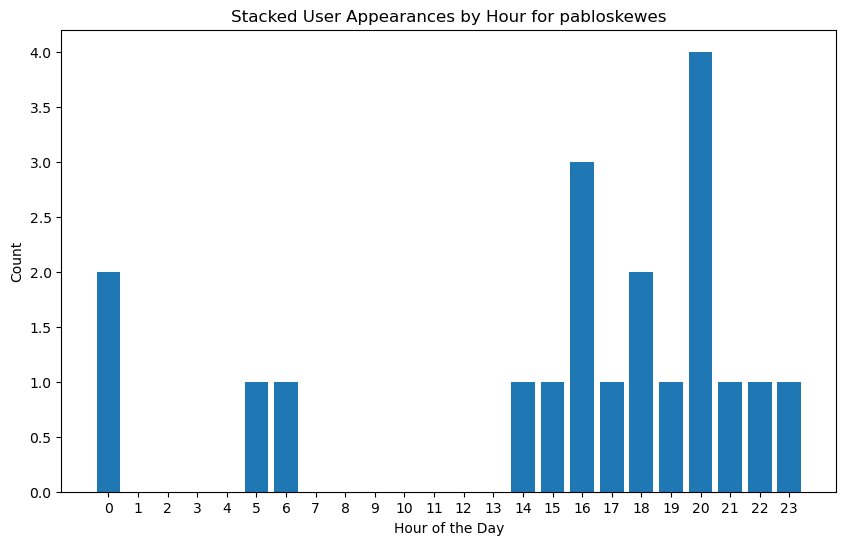

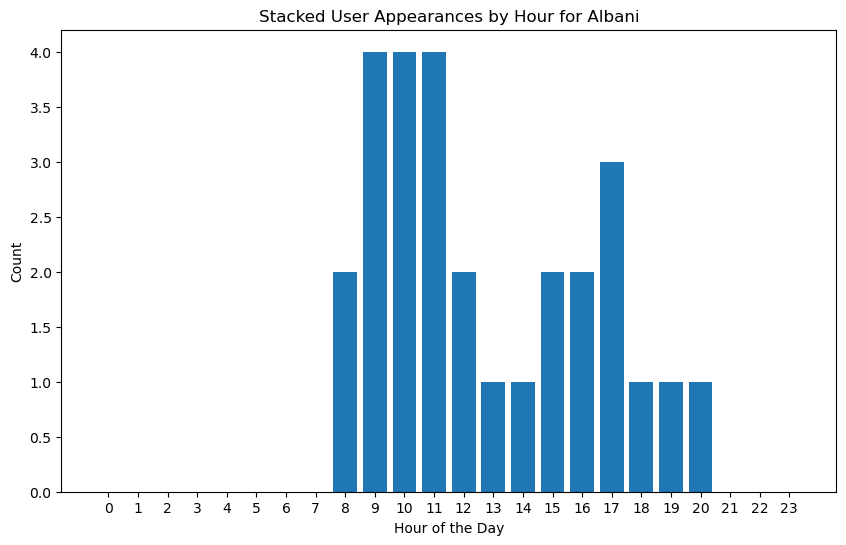

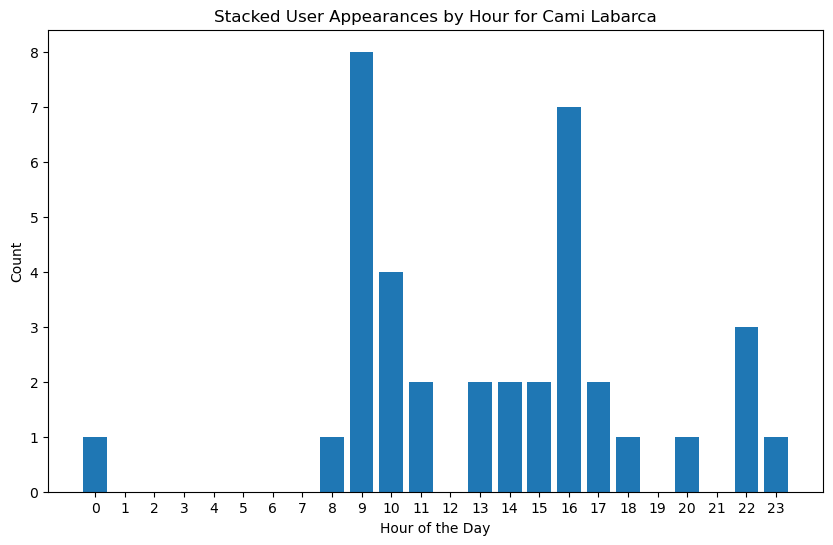

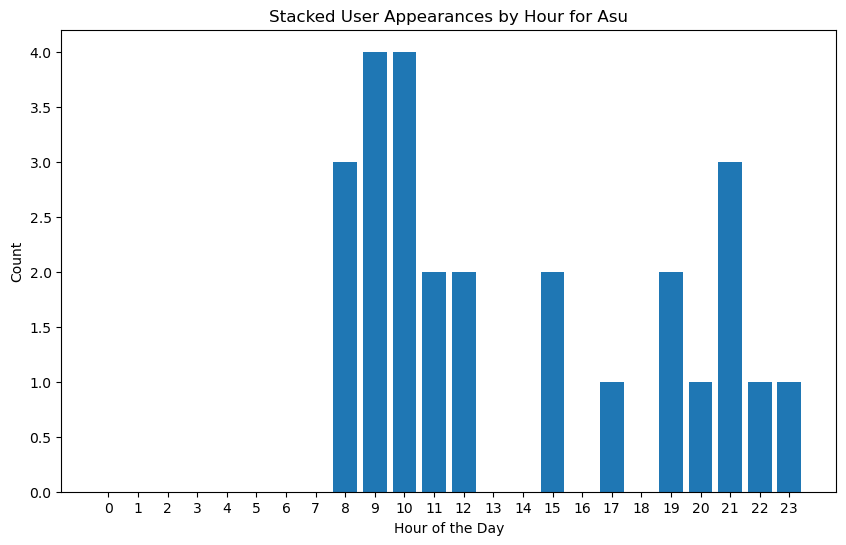

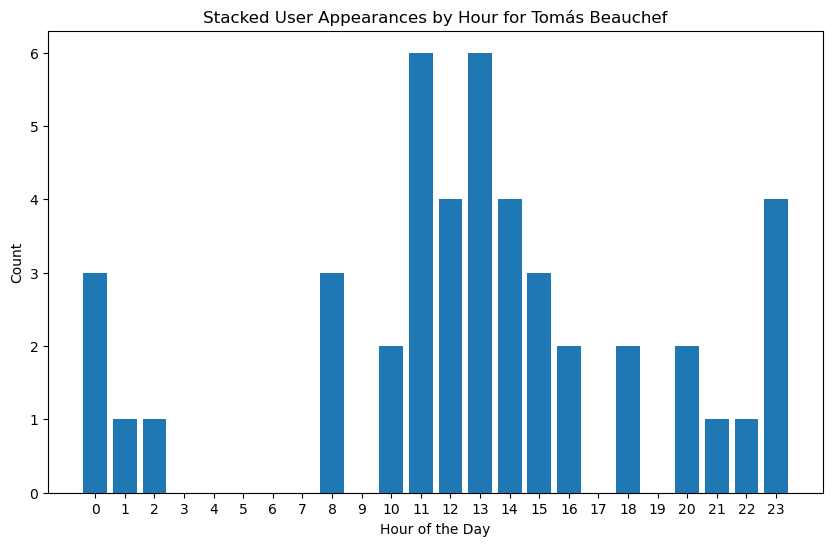

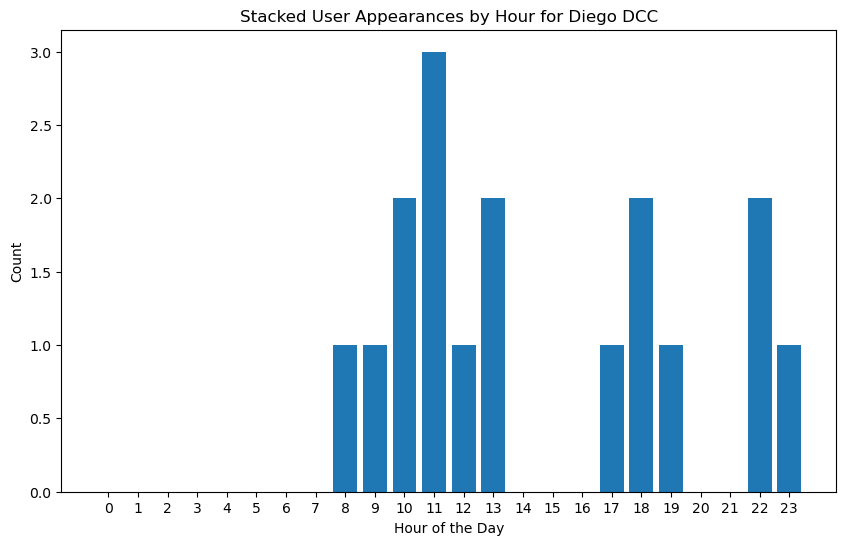

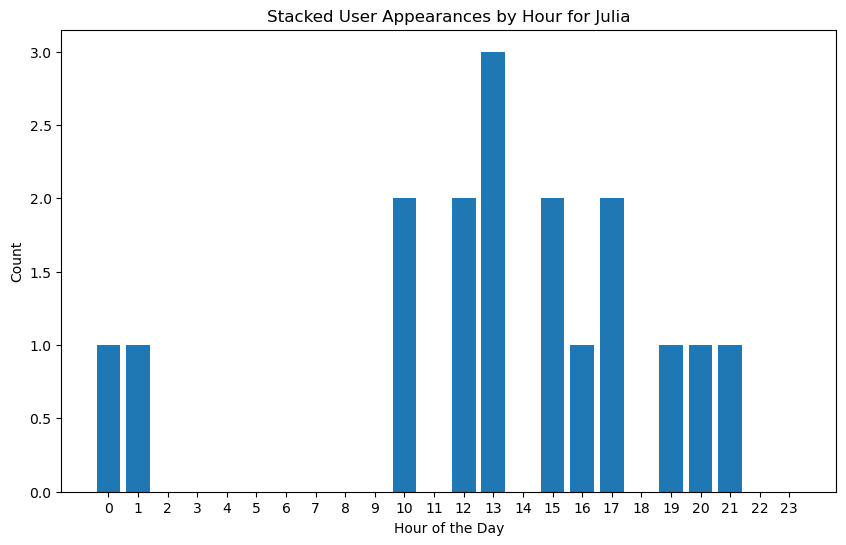

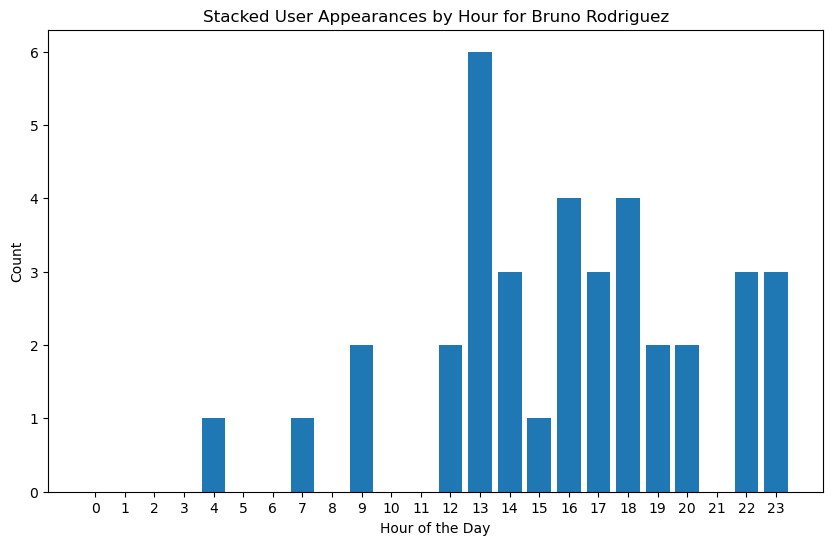

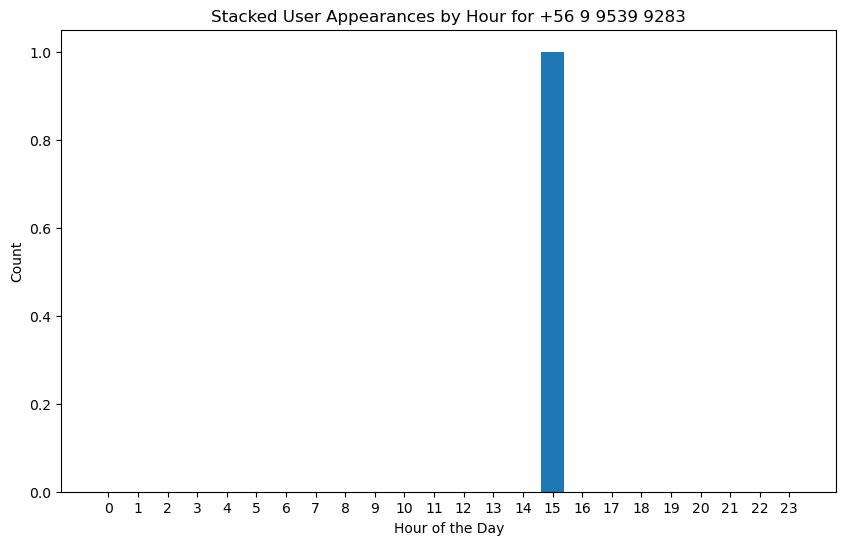

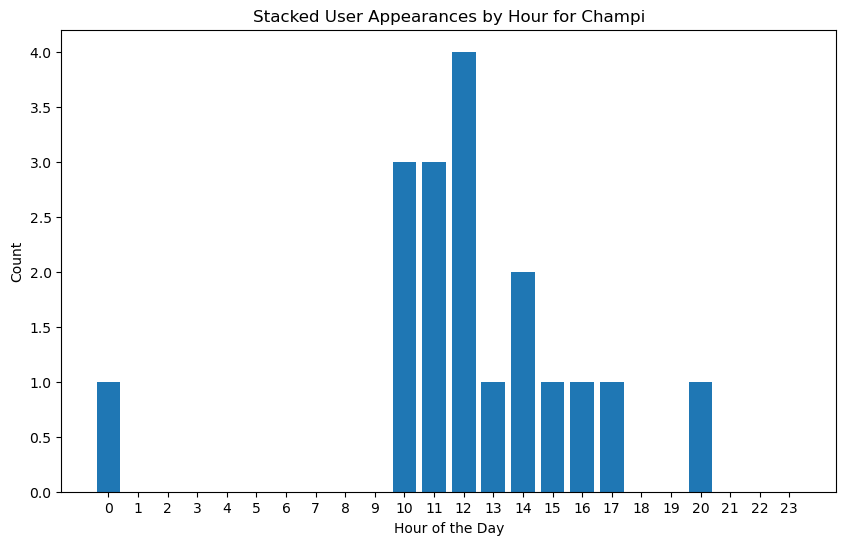

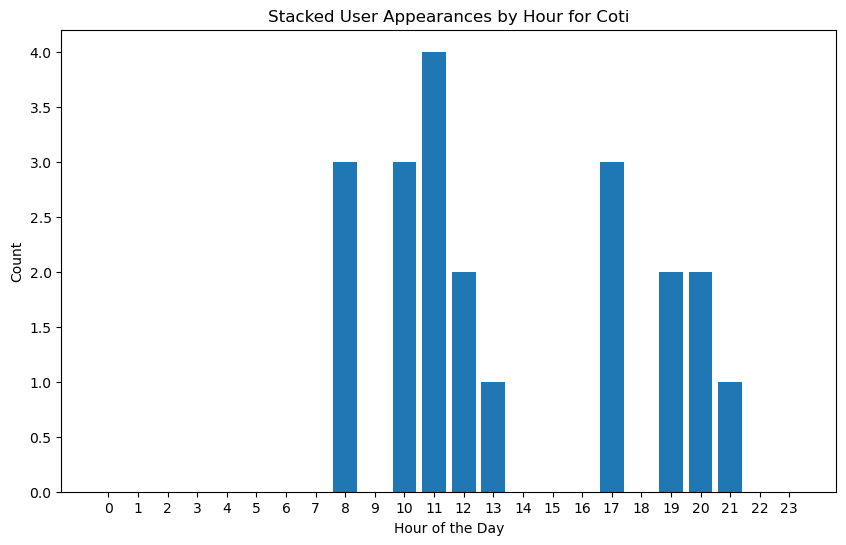

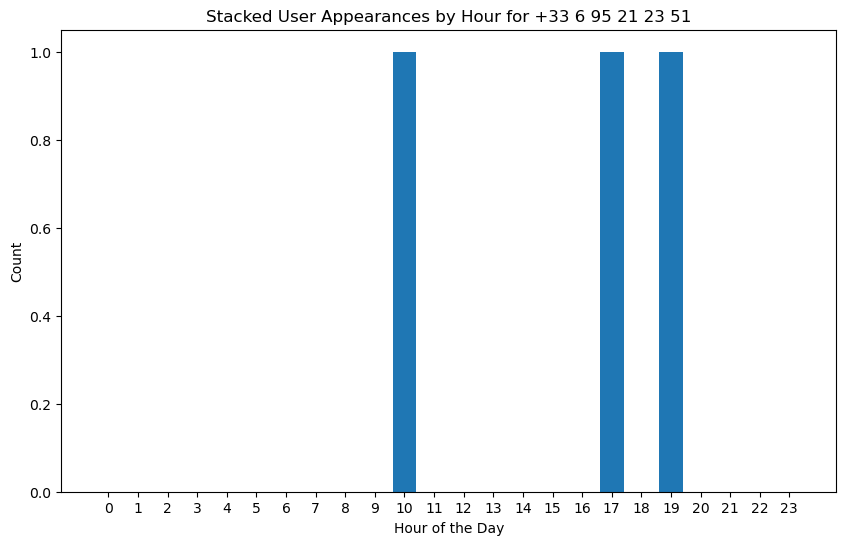

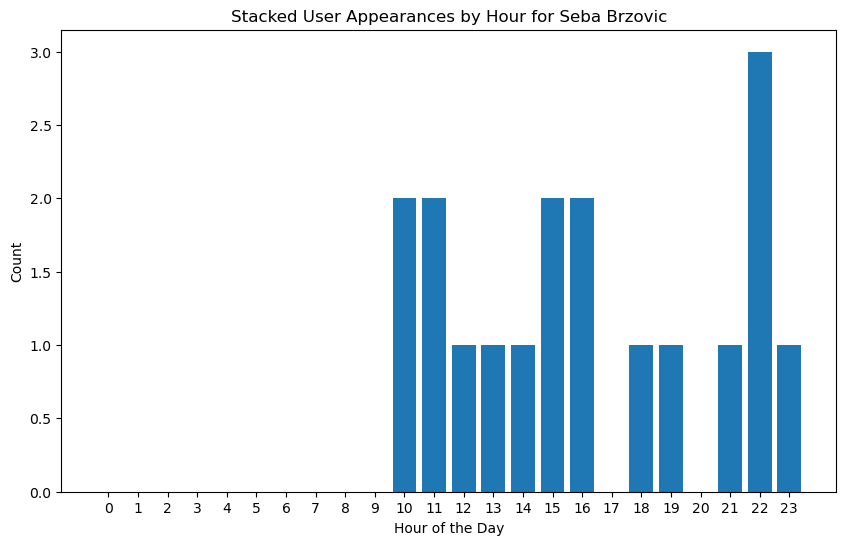

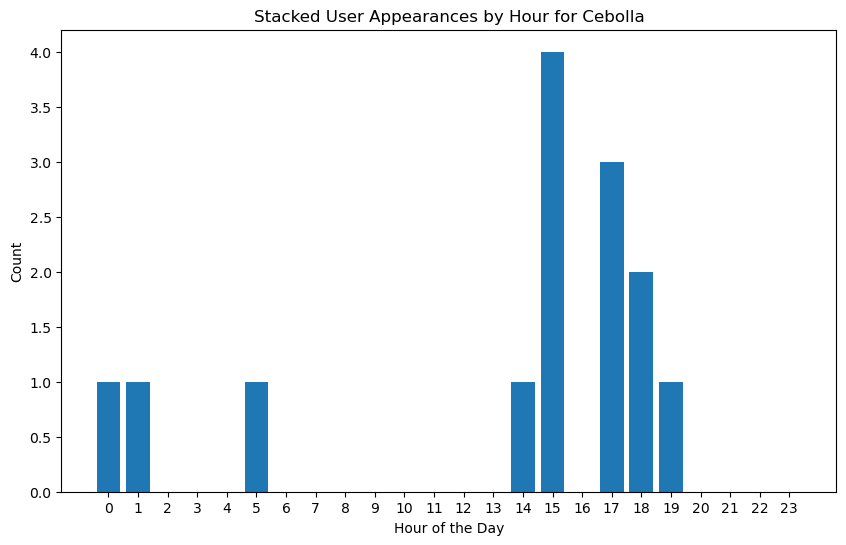

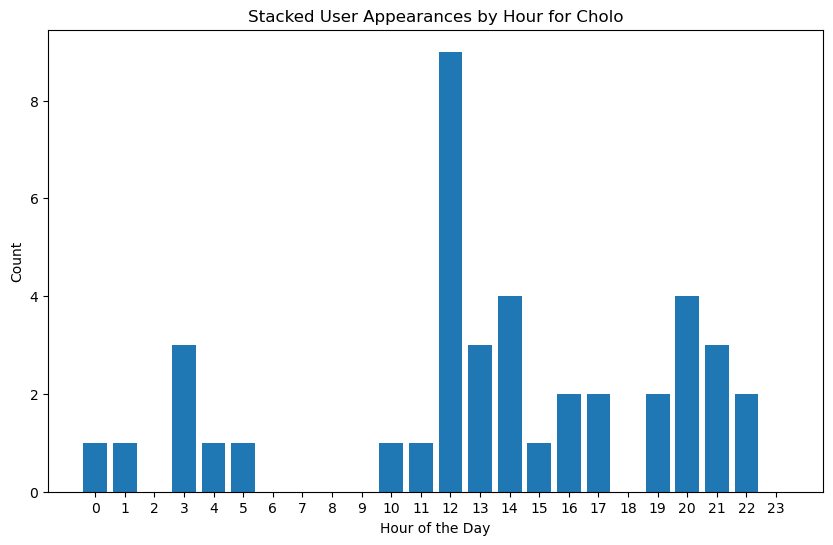

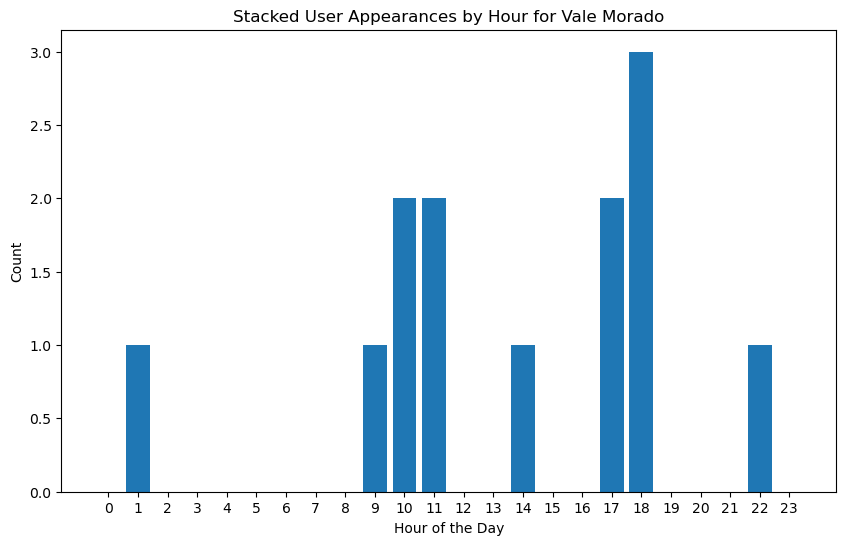

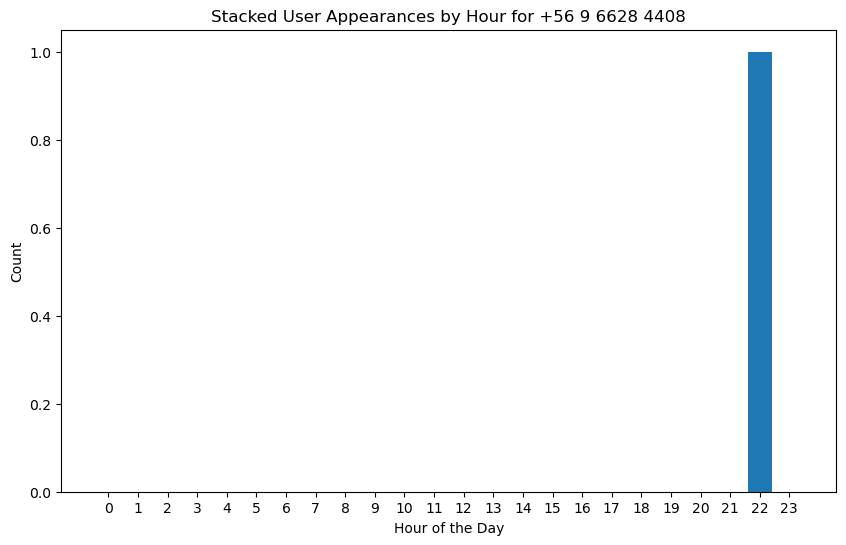

In [10]:
df = pd.DataFrame(data)

# Convert 'datetime' column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract the hour and user
df['hour_of_day'] = df['datetime'].dt.hour

# Group by hour and user, and count the occurrences
user_hourly_counts = df.groupby(['hour_of_day', 'user']).size().unstack(fill_value=0)

# Create a separate stacked bar plot for each user for each hour
hours_of_day = range(24)

for user in df['user'].unique():
    fig, ax = plt.subplots(figsize=(10, 6))
    user_data = user_hourly_counts[user]
    
    bottom = None
    ax.bar(user_data.index, user_data.values, label=user, bottom=bottom)
    
    # Set labels and title
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Count')
    ax.set_title(f'Stacked User Appearances by Hour for {user}')
    
    # Hide the legend
    ax.legend().set_visible(False)
    
    # Set x-axis to show hourly ticks
    ax.set_xticks(hours_of_day)
    
    # Show the plot
    plt.show()